In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Datasets
tv_ratings_data = pd.read_csv('tv_ratings_data.csv')

In [3]:
# Display the first few rows of the dataframe
tv_ratings_data.head(2)

,Date_Id,Household_Cd,Channel_Id,Channel_Name,Channel_Sub_Id,Member_cd,Viewing_Start_Tm,Viewing_End_Tm,Gender,Age_Band,...,end_time,dayparts,daypart_duration,start_time_seconds,end_time_seconds,viewed_seconds,Hour_day,hour_duration,AMR_member_weights,AMR_household_weights
0,2023-10-30,H1106073,9,e.tv,0,AA,181920,181937,Females,Age 50+,...,18:19:37,Evening,14400,65960,65977,17,Hour_18_19,3600,15.146103,22.646881
1,2023-10-30,H1106073,1,SABC 2,0,AA,64640,64921,Females,Age 50+,...,06:49:21,Early Morning,10800,24400,24561,161,Hour_23_24,3600,143.442503,214.479281


In [4]:
# dropping column AMR_household_weights 
tv_ratings_data.drop(tv_ratings_data.columns[-1], axis=1, inplace=True)


In [5]:
# Display the first few rows of the dataframe
tv_ratings_data.head()

,Date_Id,Household_Cd,Channel_Id,Channel_Name,Channel_Sub_Id,Member_cd,Viewing_Start_Tm,Viewing_End_Tm,Gender,Age_Band,...,start_time,end_time,dayparts,daypart_duration,start_time_seconds,end_time_seconds,viewed_seconds,Hour_day,hour_duration,AMR_member_weights
0,2023-10-30,H1106073,9,e.tv,0,AA,181920,181937,Females,Age 50+,...,18:19:20,18:19:37,Evening,14400,65960,65977,17,Hour_18_19,3600,15.146103
1,2023-10-30,H1106073,1,SABC 2,0,AA,64640,64921,Females,Age 50+,...,06:46:40,06:49:21,Early Morning,10800,24400,24561,161,Hour_23_24,3600,143.442503
2,2023-10-30,H1106073,1,SABC 2,0,AA,64922,65056,Females,Age 50+,...,06:49:22,06:50:56,Early Morning,10800,24562,24656,94,Hour_23_24,3600,83.749039
3,2023-10-30,H1106073,8,S3,0,AA,140523,145419,Females,Age 50+,...,14:05:23,14:54:19,Afternoon,14400,50723,53659,2936,Hour_14_15,3600,2615.821044
4,2023-10-30,H1106073,4,SABC 1,0,AA,202811,210053,Females,Age 50+,...,20:28:11,21:00:53,Night,14400,73691,75653,1962,Hour_20_21,3600,1748.038450


In [6]:
# To observe all the rows
pd.set_option("display.max_rows",None)

# To observe all the columns
pd.set_option("display.max_columns",None)

In [7]:
# Count of occurrences of specific values in a Channel_Id column
value_counts = tv_ratings_data['Channel_Id'].value_counts().reset_index().rename(columns={'index': 'Channel_Id', 'Channel_Id': 'Count'})
print(value_counts.head())

   Channel_Id  Count
0           4  28946
1           9  27443
2           1   9663
3         210   8891
4         248   8434


In [8]:
# Count of occurrences of specific values in a Channel_Name column
value_counts = tv_ratings_data['Channel_Name'].value_counts().reset_index().rename(columns={'index': 'Channel_Name', 'Channel_Name': 'Count'})
print(value_counts.head())

   Channel_Name  Count
0        SABC 1  28946
1          e.tv  27443
2        SABC 2   9663
3  Mzansi Wethu   8891
4        eExtra   8434


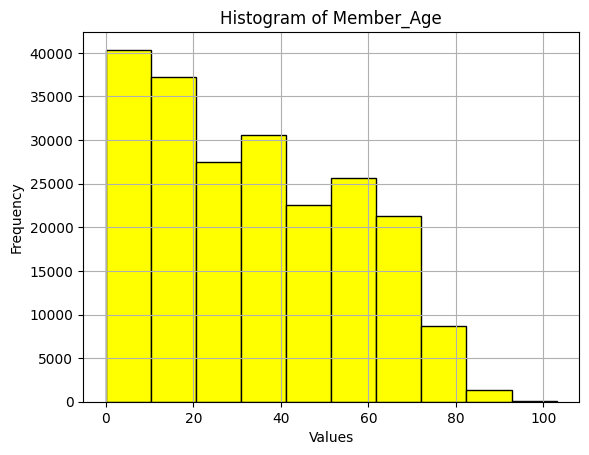

In [9]:
# Create a histogram
plt.hist(tv_ratings_data['Member_Age'],color='yellow', edgecolor='black')  
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Member_Age')
plt.grid(True)
plt.show()


Conclusion:  

Looking at the graph above, we notice that over half of the data falls within the age range of 0 to 40.

In [10]:
# Grouping by 'channel_id' and 'Channel_Name' and calculating the total viewed_seconds for each channel
grouped_data = tv_ratings_data.groupby(['Channel_Id', 'Channel_Name'])['viewed_seconds'].sum()

In [11]:
# Sorting the data to find top channels by viewed_seconds
top_channels = grouped_data.groupby('Channel_Id').sum().nlargest(10)

In [12]:
# Filtering the grouped data for top channels
top_channels_data = grouped_data[grouped_data.index.get_level_values('Channel_Id').isin(top_channels.index)]

In [13]:
# Reshaping data for plotting
# top_channels_data = top_channels_data.unstack(level=0)

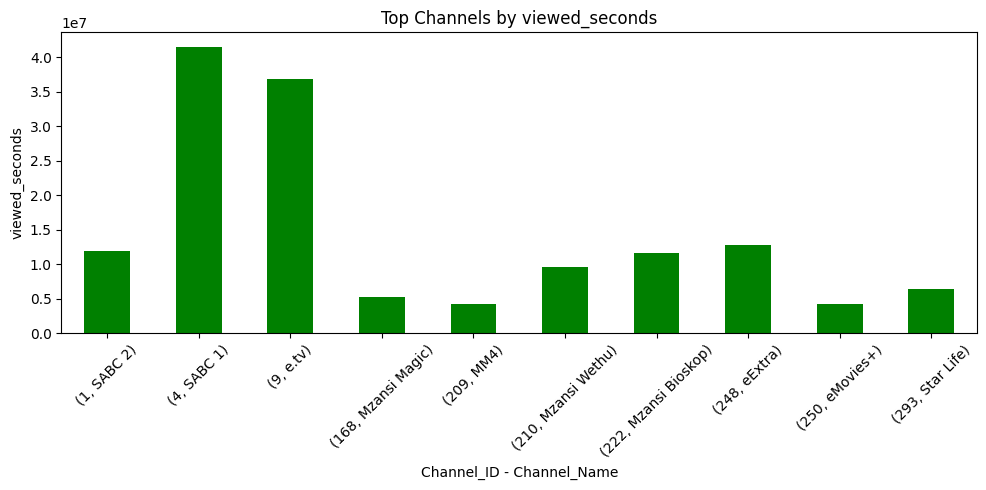

In [14]:
# Creating a bar plot for top channels by viewed_seconds
plt.figure(figsize=(10,5))
top_channels_data.plot(kind='bar',color='g')
plt.xlabel('Channel_ID - Channel_Name')
plt.ylabel('viewed_seconds')
plt.title('Top Channels by viewed_seconds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion:  

These are the top 10 channels with the highest number of views.

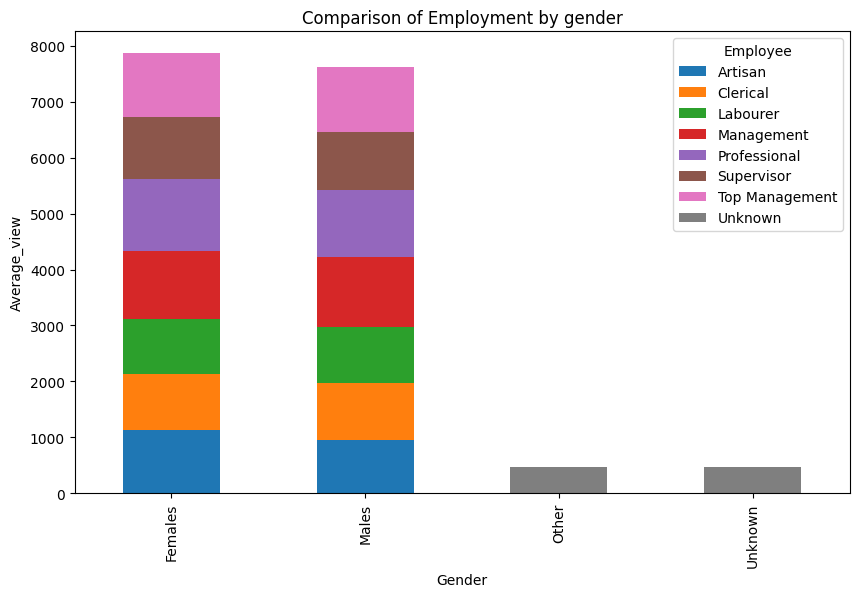

In [15]:
# Pivot the data to prepare for a stacked bar chart
pivot_df = tv_ratings_data.pivot_table(values='viewed_seconds', index='Gender', columns='Employee', aggfunc='mean')

# Plotting a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Comparison of Employment by gender')
plt.xlabel('Gender')
plt.ylabel('Average_view')
plt.legend(title='Employee')
plt.show()


Conclusion:  

Women working in different jobs and men in various professions have very similar preferences when it comes to watching channels

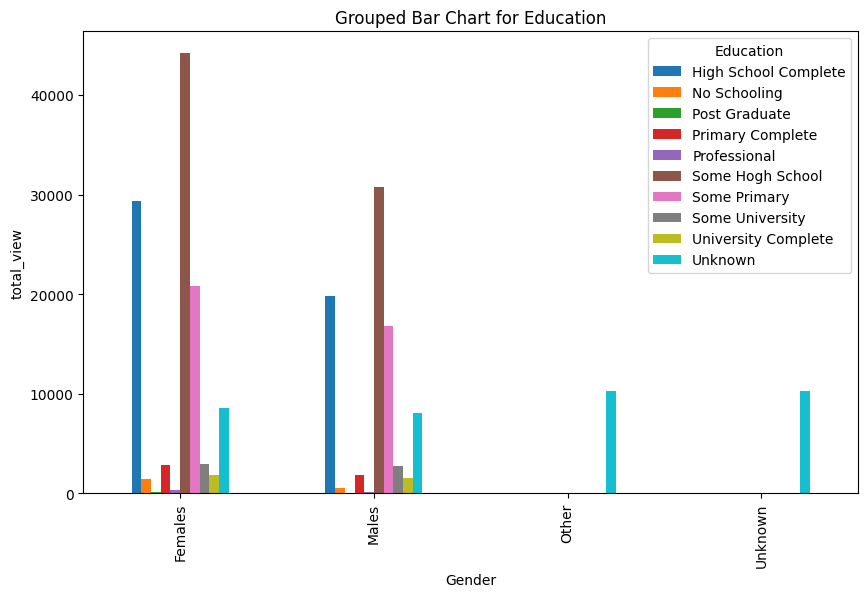

In [16]:
# Getting value counts for each combination of categories
grouped_data = tv_ratings_data.groupby(['Gender', 'Education']).size().unstack(fill_value=0)

# Plotting a grouped bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Grouped Bar Chart for Education')
plt.xlabel('Gender')
plt.ylabel('total_view')
plt.legend(title='Education')
plt.show()

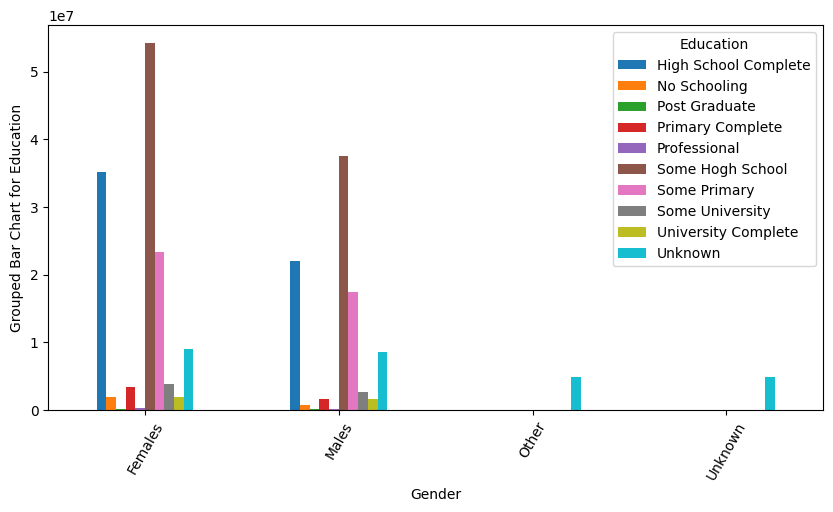

In [17]:
# Grouping data by both 'Gender' and 'Education', then calculating the sum of 'viewed_seconds'
grouped_data = tv_ratings_data.groupby(['Gender', 'Education'])['viewed_seconds'].sum()

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(10, 5))
grouped_data.unstack().plot(kind='bar', ax=ax)
plt.xlabel('Gender')
plt.ylabel('Grouped Bar Chart for Education')
plt.legend(title='Education')
plt.xticks(rotation=60)
plt.show()

Conclusion:  

Women who have attended some high school, completed high school, or have some primary education spend more time watching channels compared to men.

In [18]:
# Display the first few rows of the dataframe
tv_ratings_data.head()

,Date_Id,Household_Cd,Channel_Id,Channel_Name,Channel_Sub_Id,Member_cd,Viewing_Start_Tm,Viewing_End_Tm,Gender,Age_Band,Employee,Resp,Education,Occup_Type,Earn_Ind,Lang,Mother0_Ind,Mother4_Ind,Mother7_Ind,Mother13_Ind,Age_Level_Band,Member_Age,Weightage1,Weightage2,Broadcast_Region,Ethnic_Cd,Ethnic_Group,Dwelling_Cd,Dwelling_Group,Head_Occupation_Cd,Spouse_Occupation_Cd,Spouse_Occupation_Desc,Lang_Cd,Avg_income_cd,Viewing_Hours_Cd,Domestic_Cd,Livein_Dom_Cd,Phone_Cd,Phone_desc,MNET_Cd,TV_Sets_Cd,TV_Sets_desc,VCR_Cd,VCR_desc,PVR_Cd,PVR_desc,Top_TV_Cd,Top_TV_desc,Cars_No,Cars_desc,HD_PVR_Cd,HD_PVR_desc,Washing_Machine_Cd,Washing_Machine_desc,MWave_Owen_Cd,Vacuum_Cleaner_Cd,Vacuum_Cleaner_desc,Community_size,Community_size_desc,Metro_Cd,Province_Cd,Province_desc,VCR_Ind,Field_Region_Cd,Field_Region_desc,Water_Laid_Ind,Supermarket_Shopper_Ind,LSM1_Cd,DSTV_Cd,HH_Size_Cd,Income_band,OVHD_Cd,OVHD_desc,Comm_Cd,Comm_desc,SEMOld_Cd,SEM_Cd,DTT,DTT_desc,Region1_Cd,Region1_Desc,Region2_Cd,Region2_Desc,Weightage1_Cd,Weightage2_Cd,Tvs_no,start_time,end_time,dayparts,daypart_duration,start_time_seconds,end_time_seconds,viewed_seconds,Hour_day,hour_duration,AMR_member_weights
0,2023-10-30,H1106073,9,e.tv,0,AA,181920,181937,Females,Age 50+,Professional,Unknown,Unknown,Other,0,Other,0,0,0,8,Age 25-34,50,3207.41,3207.41,Broadcast region 1,4,Ethnic group black,2,Dwelling type house,1,0,Spouse occupation unknown,6,K,0,0,0,1,Phone,0,1,TV Sets 1,0,VCR 0,0,PVR No,0,Top TV No,0,Cars 0,0,HD PVR NO,0,Washing Machine No,0,0,Vacuum Cleaner No,1,Community size Metropolitan,0,5,Kwanatal,N,0,Field region NA,0,0,6,0,6,E,1,OVHD Yes,2,COMM_Small Urban,0,7,0,DTT No,1,National,4.0,OVHD,4795.81,4795.81,1.0,18:19:20,18:19:37,Evening,14400,65960,65977,17,Hour_18_19,3600,15.146103
1,2023-10-30,H1106073,1,SABC 2,0,AA,64640,64921,Females,Age 50+,Professional,Unknown,Unknown,Other,0,Other,0,0,0,8,Age 25-34,50,3207.41,3207.41,Broadcast region 1,4,Ethnic group black,2,Dwelling type house,1,0,Spouse occupation unknown,6,K,0,0,0,1,Phone,0,1,TV Sets 1,0,VCR 0,0,PVR No,0,Top TV No,0,Cars 0,0,HD PVR NO,0,Washing Machine No,0,0,Vacuum Cleaner No,1,Community size Metropolitan,0,5,Kwanatal,N,0,Field region NA,0,0,6,0,6,E,1,OVHD Yes,2,COMM_Small Urban,0,7,0,DTT No,1,National,4.0,OVHD,4795.81,4795.81,1.0,06:46:40,06:49:21,Early Morning,10800,24400,24561,161,Hour_23_24,3600,143.442503
2,2023-10-30,H1106073,1,SABC 2,0,AA,64922,65056,Females,Age 50+,Professional,Unknown,Unknown,Other,0,Other,0,0,0,8,Age 25-34,50,3207.41,3207.41,Broadcast region 1,4,Ethnic group black,2,Dwelling type house,1,0,Spouse occupation unknown,6,K,0,0,0,1,Phone,0,1,TV Sets 1,0,VCR 0,0,PVR No,0,Top TV No,0,Cars 0,0,HD PVR NO,0,Washing Machine No,0,0,Vacuum Cleaner No,1,Community size Metropolitan,0,5,Kwanatal,N,0,Field region NA,0,0,6,0,6,E,1,OVHD Yes,2,COMM_Small Urban,0,7,0,DTT No,1,National,4.0,OVHD,4795.81,4795.81,1.0,06:49:22,06:50:56,Early Morning,10800,24562,24656,94,Hour_23_24,3600,83.749039
3,2023-10-30,H1106073,8,S3,0,AA,140523,145419,Females,Age 50+,Professional,Unknown,Unknown,Other,0,Other,0,0,0,8,Age 25-34,50,3207.41,3207.41,Broadcast region 1,4,Ethnic group black,2,Dwelling type house,1,0,Spouse occupation unknown,6,K,0,0,0,1,Phone,0,1,TV Sets 1,0,VCR 0,0,PVR No,0,Top TV No,0,Cars 0,0,HD PVR NO,0,Washing Machine No,0,0,Vacuum Cleaner No,1,Community size Metropolitan,0,5,Kwanatal,N,0,Field region NA,0,0,6,0,6,E,1,OVHD Yes,2,COMM_Small Urban,0,7,0,DTT No,1,National,4.0,OVHD,4795.81,4795.81,1.0,14:05:23,14:54:19,Afternoon,14400,50723,53659,2936,Hour_14_15,3600,2615.821044
4,2023-10-30,H1106073,4,SABC 1,0,AA,202811,210053,Females,Age 50+,Professional,Unknown,Unknown,Other,0,Other,0,0,0,8,Age 25-34,50,3207.41,3207.41,Broadcast region 1,4,Ethnic group black,2,Dwelling type house,1,0,Spouse occupation unknown,6,K,0,0,0,1,Phone,0,1,TV Sets 1,0,VCR 0,0,PVR No,0,Top TV No,0,Cars 0,0,HD PVR NO,0,Washing Machine No,0,0,Vacuum Cleaner No,1,Community size Metropolitan,0,5,Kwanatal,N,0,Field region NA,0,0,6,0,6,E,

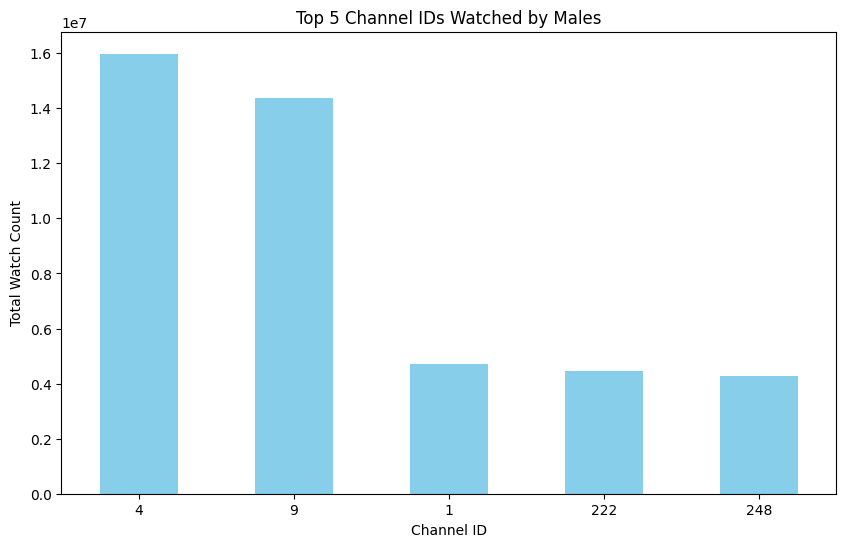

In [19]:
# Filter by gender (e.g., 'Male')
gender_to_analyze = 'Males'
filtered_data = tv_ratings_data[tv_ratings_data['Gender'] == gender_to_analyze]

# Group by channel_id and sum the viewed_seconds
channel_watch_counts = filtered_data.groupby('Channel_Id')['viewed_seconds'].sum()

# Get top 5 channels watched by the Male
top_5_channels = channel_watch_counts.nlargest(5)

# Plotting a bar chart for top 5 channels watched by the Male
top_5_channels.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'Top 5 Channel IDs Watched by {gender_to_analyze}')
plt.xlabel('Channel ID')
plt.ylabel('Total Watch Count')
plt.xticks(rotation=0)
plt.show()


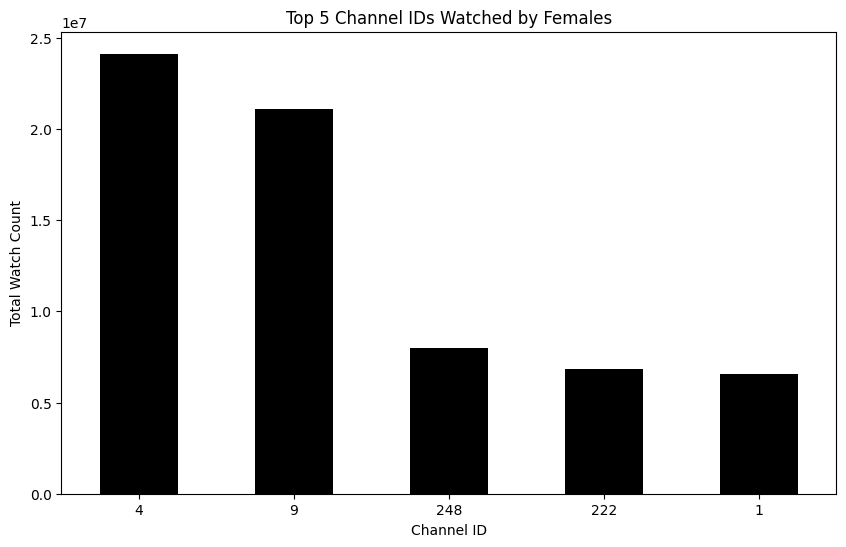

In [20]:
# Filter by gender (e.g., 'Female')
gender_to_analyze = 'Females'
filtered_data = tv_ratings_data[tv_ratings_data['Gender'] == gender_to_analyze]

# Group by channel_id and sum the viewed_seconds
channel_watch_counts = filtered_data.groupby('Channel_Id')['viewed_seconds'].sum()

# Get top 5 channels watched by the Females
top_5_channels = channel_watch_counts.nlargest(5)

# Plotting a bar chart for top 5 channels watched by the Females
top_5_channels.plot(kind='bar', figsize=(10, 6), color='k')
plt.title(f'Top 5 Channel IDs Watched by {gender_to_analyze}')
plt.xlabel('Channel ID')
plt.ylabel('Total Watch Count')
plt.xticks(rotation=0)
plt.show()

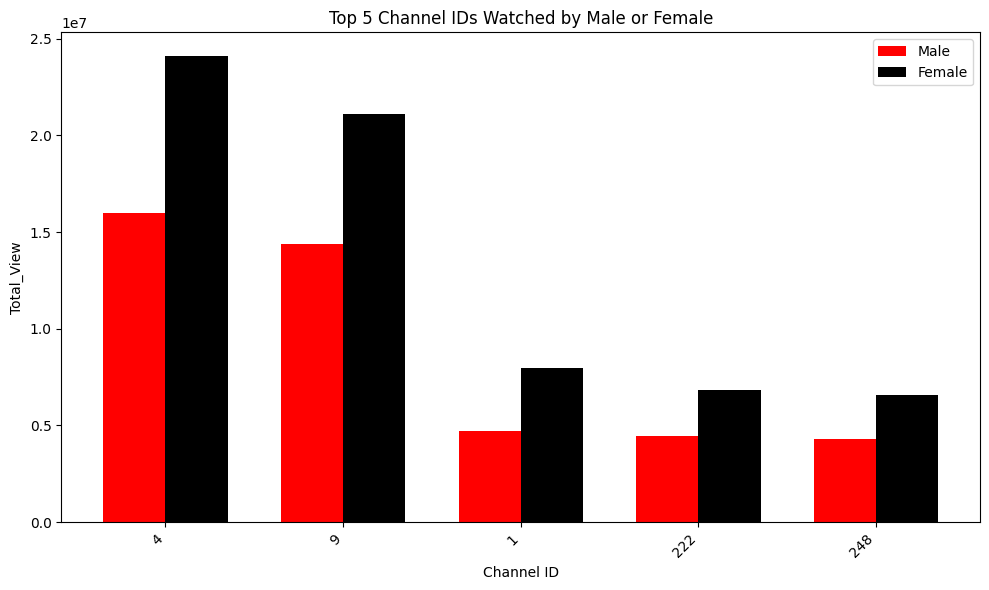

In [21]:
# Group by gender and channel_id and sum the viewed_seconds
channel_watch_counts = tv_ratings_data.groupby(['Gender', 'Channel_Id',])['viewed_seconds'].sum().unstack(fill_value=0)

# Get top 5 channels watched by each gender
top_5_channels_male = channel_watch_counts.loc['Males'].nlargest(5)
top_5_channels_female = channel_watch_counts.loc['Females'].nlargest(5)

# Plotting a grouped bar chart for top 5 channels watched by each gender
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions_male = range(len(top_5_channels_male))
bar_positions_female = [pos + bar_width for pos in bar_positions_male]

ax.bar(bar_positions_male, top_5_channels_male, bar_width, label='Male', color='r')
ax.bar(bar_positions_female, top_5_channels_female, bar_width, label='Female', color='k')

ax.set_title('Top 5 Channel IDs Watched by Male or Female')
ax.set_xlabel('Channel ID')
ax.set_ylabel('Total_View')
ax.set_xticks([pos + bar_width/2 for pos in bar_positions_male])
ax.set_xticklabels(top_5_channels_male.index)
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Conclusion:  


Looking at the graph above, it's clear that among the top 5 channels, females spend more time watching compared to males.
    

In [22]:
# Count of occurrences of specific values in a Phone_desc column
tv_ratings_data['Phone_desc'].value_counts()

Phone               206957
Phone Dataline        6389
Phone - No Phone      1867
Name: Phone_desc, dtype: int64

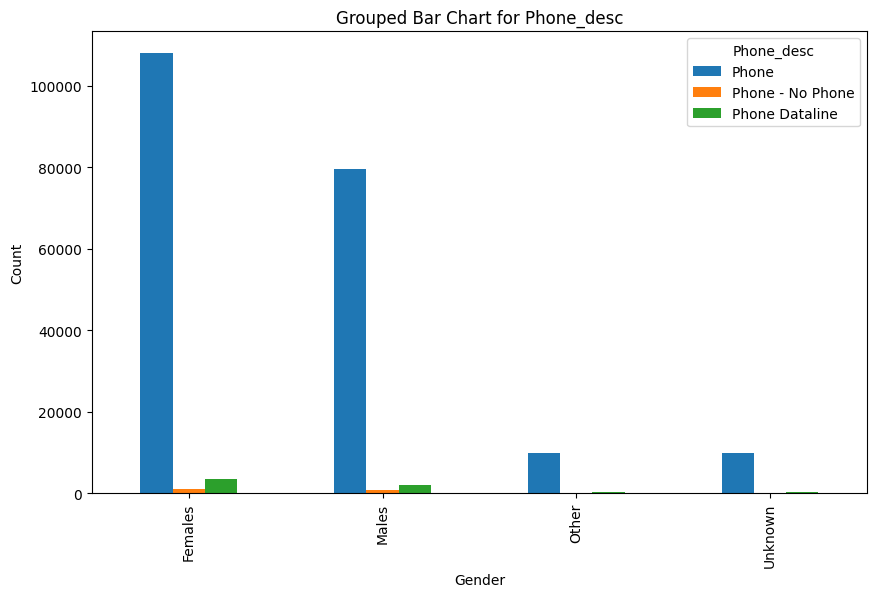

In [23]:
# Getting value counts for each combination of categories
grouped_data = tv_ratings_data.groupby(['Gender', 'Phone_desc']).size().unstack(fill_value=0)

# Plotting a grouped bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Grouped Bar Chart for Phone_desc')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Phone_desc')
plt.show()

In [24]:
# Display the first few rows of the dataframe
tv_ratings_data.head(2)

,Date_Id,Household_Cd,Channel_Id,Channel_Name,Channel_Sub_Id,Member_cd,Viewing_Start_Tm,Viewing_End_Tm,Gender,Age_Band,Employee,Resp,Education,Occup_Type,Earn_Ind,Lang,Mother0_Ind,Mother4_Ind,Mother7_Ind,Mother13_Ind,Age_Level_Band,Member_Age,Weightage1,Weightage2,Broadcast_Region,Ethnic_Cd,Ethnic_Group,Dwelling_Cd,Dwelling_Group,Head_Occupation_Cd,Spouse_Occupation_Cd,Spouse_Occupation_Desc,Lang_Cd,Avg_income_cd,Viewing_Hours_Cd,Domestic_Cd,Livein_Dom_Cd,Phone_Cd,Phone_desc,MNET_Cd,TV_Sets_Cd,TV_Sets_desc,VCR_Cd,VCR_desc,PVR_Cd,PVR_desc,Top_TV_Cd,Top_TV_desc,Cars_No,Cars_desc,HD_PVR_Cd,HD_PVR_desc,Washing_Machine_Cd,Washing_Machine_desc,MWave_Owen_Cd,Vacuum_Cleaner_Cd,Vacuum_Cleaner_desc,Community_size,Community_size_desc,Metro_Cd,Province_Cd,Province_desc,VCR_Ind,Field_Region_Cd,Field_Region_desc,Water_Laid_Ind,Supermarket_Shopper_Ind,LSM1_Cd,DSTV_Cd,HH_Size_Cd,Income_band,OVHD_Cd,OVHD_desc,Comm_Cd,Comm_desc,SEMOld_Cd,SEM_Cd,DTT,DTT_desc,Region1_Cd,Region1_Desc,Region2_Cd,Region2_Desc,Weightage1_Cd,Weightage2_Cd,Tvs_no,start_time,end_time,dayparts,daypart_duration,start_time_seconds,end_time_seconds,viewed_seconds,Hour_day,hour_duration,AMR_member_weights
0,2023-10-30,H1106073,9,e.tv,0,AA,181920,181937,Females,Age 50+,Professional,Unknown,Unknown,Other,0,Other,0,0,0,8,Age 25-34,50,3207.41,3207.41,Broadcast region 1,4,Ethnic group black,2,Dwelling type house,1,0,Spouse occupation unknown,6,K,0,0,0,1,Phone,0,1,TV Sets 1,0,VCR 0,0,PVR No,0,Top TV No,0,Cars 0,0,HD PVR NO,0,Washing Machine No,0,0,Vacuum Cleaner No,1,Community size Metropolitan,0,5,Kwanatal,N,0,Field region NA,0,0,6,0,6,E,1,OVHD Yes,2,COMM_Small Urban,0,7,0,DTT No,1,National,4.0,OVHD,4795.81,4795.81,1.0,18:19:20,18:19:37,Evening,14400,65960,65977,17,Hour_18_19,3600,15.146103
1,2023-10-30,H1106073,1,SABC 2,0,AA,64640,64921,Females,Age 50+,Professional,Unknown,Unknown,Other,0,Other,0,0,0,8,Age 25-34,50,3207.41,3207.41,Broadcast region 1,4,Ethnic group black,2,Dwelling type house,1,0,Spouse occupation unknown,6,K,0,0,0,1,Phone,0,1,TV Sets 1,0,VCR 0,0,PVR No,0,Top TV No,0,Cars 0,0,HD PVR NO,0,Washing Machine No,0,0,Vacuum Cleaner No,1,Community size Metropolitan,0,5,Kwanatal,N,0,Field region NA,0,0,6,0,6,E,1,OVHD Yes,2,COMM_Small Urban,0,7,0,DTT No,1,National,4.0,OVHD,4795.81,4795.81,1.0,06:46:40,06:49:21,Early Morning,10800,24400,24561,161,Hour_23_24,3600,143.442503


In [25]:
# Count of occurrences of specific values in a Region1_Desc column
tv_ratings_data['Region1_Desc'].value_counts()

 National    215213
Name: Region1_Desc, dtype: int64

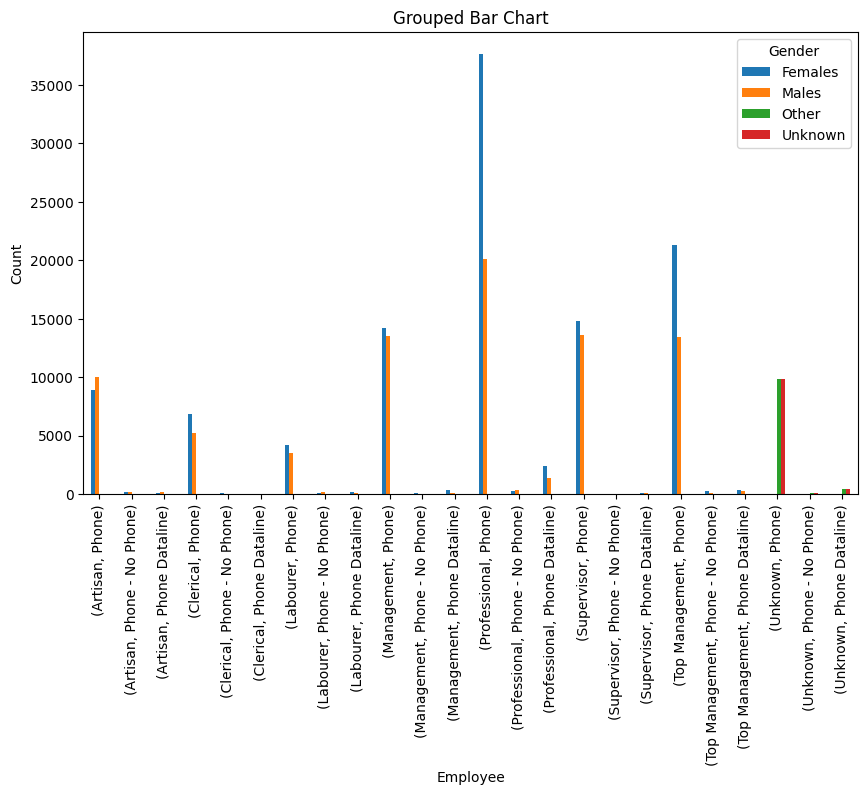

In [26]:
# Getting value counts for each combination of categories
grouped_data = tv_ratings_data.groupby(['Employee', 'Phone_desc','Gender']).size().unstack(fill_value=0)

# Plotting a grouped bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Grouped Bar Chart')
plt.xlabel('Employee')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

Conclusion:  


From the graph above, it's evident that women with various professions have more phones and more phone Dataline compared to men with different professions.

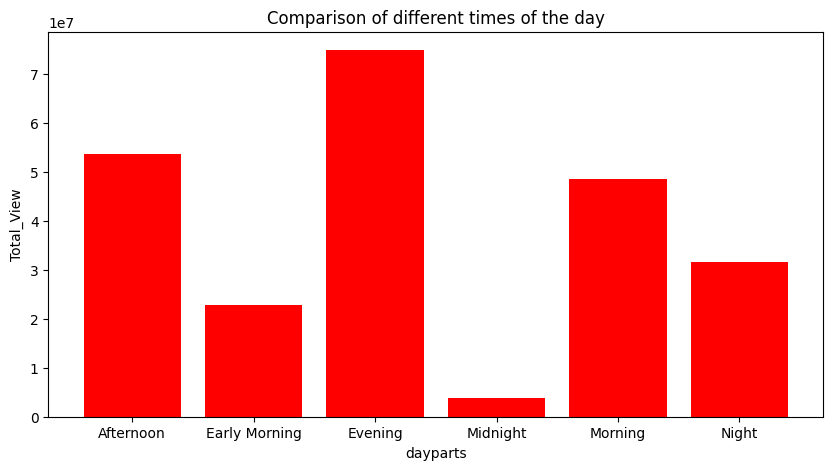

In [27]:
# Grouping data by 'dayparts' and calculating the sum of 'viewed_seconds'
grouped_data = tv_ratings_data.groupby('dayparts')['viewed_seconds'].sum()

# Plotting a bar chart
plt.figure(figsize=(10,5))
plt.bar(grouped_data.index, grouped_data.values, color='r')

plt.xlabel('dayparts')
plt.ylabel('Total_View')
plt.title('Comparison of different times of the day')

# Display the chart
plt.show()

Conclusion:  
    
Looking at the graph above, we can see that there are more views during the evening, while there are fewer views around midnight.

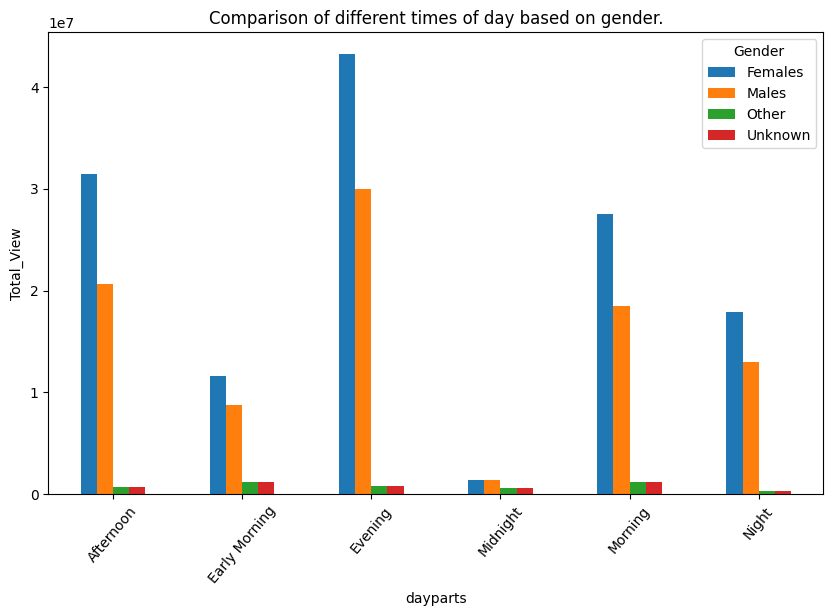

In [28]:
# Grouping data by both 'dayparts' and 'Gender', then calculating the sum of 'viewed_seconds'
grouped_data = tv_ratings_data.groupby(['dayparts', 'Gender'])['viewed_seconds'].sum()

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.unstack().plot(kind='bar', ax=ax)
plt.xlabel('dayparts')
plt.ylabel('Total_View')
plt.title('Comparison of different times of day based on gender.')
plt.legend(title='Gender')
plt.xticks(rotation=50)
plt.show()

Conclusion:   
    

Looking at the graph above, it's clear that at any time of day, women spend more time watching channels than men do

<AxesSubplot: title={'center': 'Correlation with target'}>

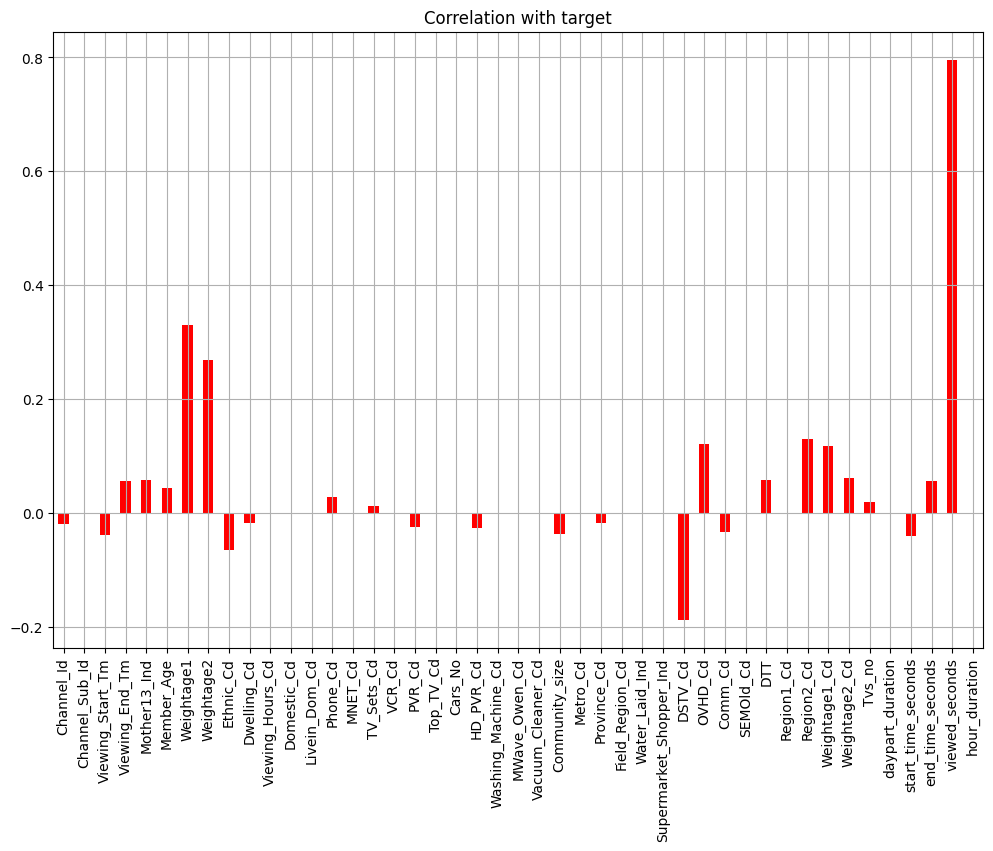

In [29]:
# Correlation with target variables
tv_ratings_data.drop('AMR_member_weights', axis=1).corrwith(tv_ratings_data.AMR_member_weights).plot(kind='bar', figsize=(12, 8), grid=True,
                                                  color='r' ,title="Correlation with target")

Conclusion:   

From the above graph we can conclude that:

Channel_Sub_Id, Viewing_Hours_Cd,Domestic_Cd,Livein_Dom_Cd,MNET_Cd,VCR_Cd,Top_TV_Cd,Cars_No,Washing_Machine_Cd,MWave_Owen_Cd, Vacuum_Cleaner_Cd,Metro_Cd,Field_Region_Cd,Water_Laid_Ind,Supermarket_Shopper_Ind,SEMOld_Cd,Region1_Cd,daypart_duration and Hour_day are not affecting the dependent variable.    

And the others are either positively or negatively co-related.

In [30]:
#  the correlation coefficients are calculated for each feature with respect to the dependent variable.
correlations = tv_ratings_data.corr()['AMR_member_weights'].abs().sort_values(ascending=False)
correlations

AMR_member_weights         1.000000
viewed_seconds             0.795949
Weightage1                 0.329839
Weightage2                 0.269657
DSTV_Cd                    0.187306
Region2_Cd                 0.129362
OVHD_Cd                    0.120483
Weightage1_Cd              0.117844
Ethnic_Cd                  0.064763
Weightage2_Cd              0.061937
Mother13_Ind               0.058375
DTT                        0.057554
end_time_seconds           0.056455
Viewing_End_Tm             0.056403
Member_Age                 0.044766
start_time_seconds         0.039350
Viewing_Start_Tm           0.038853
Community_size             0.036664
Comm_Cd                    0.032486
Phone_Cd                   0.027679
HD_PVR_Cd                  0.026755
PVR_Cd                     0.024968
Channel_Id                 0.019913
Tvs_no                     0.019130
Province_Cd                0.017663
Dwelling_Cd                0.016635
TV_Sets_Cd                 0.011926
daypart_duration           0

In [31]:
# Dropping the columns that have no relationship with the dependent variables
columns_to_drop=['Channel_Sub_Id','Viewing_Hours_Cd','Domestic_Cd','Livein_Dom_Cd','MNET_Cd','VCR_Cd','Top_TV_Cd','Cars_No','Washing_Machine_Cd',
     'MWave_Owen_Cd','Vacuum_Cleaner_Cd','Metro_Cd','Field_Region_Cd','Water_Laid_Ind','Supermarket_Shopper_Ind','SEMOld_Cd',
     'Region1_Cd','hour_duration','Date_Id']

In [32]:
# Size of the dataset
tv_ratings_data.shape

(215213, 96)

In [33]:
tv_ratings_data.drop(columns=columns_to_drop, inplace=True)

In [34]:
# Size of the dataset
tv_ratings_data.shape

(215213, 77)

### Data Preprocessing


##### Encoding techniques are used to convert categorical data into a numerical format that machine learning models can process.

In [35]:
# Getting the categorical values from the dataset.
cate=tv_ratings_data.select_dtypes(include='object').columns
cate

Index(['Household_Cd', 'Channel_Name', 'Member_cd', 'Gender', 'Age_Band',
       'Employee', 'Resp', 'Education', 'Occup_Type', 'Earn_Ind', 'Lang',
       'Mother0_Ind', 'Mother4_Ind', 'Mother7_Ind', 'Age_Level_Band',
       'Broadcast_Region', 'Ethnic_Group', 'Dwelling_Group',
       'Head_Occupation_Cd', 'Spouse_Occupation_Cd', 'Spouse_Occupation_Desc',
       'Lang_Cd', 'Avg_income_cd', 'Phone_desc', 'TV_Sets_desc', 'VCR_desc',
       'PVR_desc', 'Top_TV_desc', 'Cars_desc', 'HD_PVR_desc',
       'Washing_Machine_desc', 'Vacuum_Cleaner_desc', 'Community_size_desc',
       'Province_desc', 'VCR_Ind', 'Field_Region_desc', 'LSM1_Cd',
       'HH_Size_Cd', 'Income_band', 'OVHD_desc', 'Comm_desc', 'SEM_Cd',
       'DTT_desc', 'Region1_Desc', 'Region2_Desc', 'start_time', 'end_time',
       'dayparts', 'Hour_day'],
      dtype='object')

In [36]:
tv_ratings_data[cate] = tv_ratings_data[cate].astype(str)

In [37]:
from sklearn.preprocessing import OrdinalEncoder
orencoder=OrdinalEncoder()

In [38]:
tv_ratings_data[cate]=orencoder.fit_transform(tv_ratings_data[cate])
tv_ratings_data.head(2)

,Household_Cd,Channel_Id,Channel_Name,Member_cd,Viewing_Start_Tm,Viewing_End_Tm,Gender,Age_Band,Employee,Resp,Education,Occup_Type,Earn_Ind,Lang,Mother0_Ind,Mother4_Ind,Mother7_Ind,Mother13_Ind,Age_Level_Band,Member_Age,Weightage1,Weightage2,Broadcast_Region,Ethnic_Cd,Ethnic_Group,Dwelling_Cd,Dwelling_Group,Head_Occupation_Cd,Spouse_Occupation_Cd,Spouse_Occupation_Desc,Lang_Cd,Avg_income_cd,Phone_Cd,Phone_desc,TV_Sets_Cd,TV_Sets_desc,VCR_desc,PVR_Cd,PVR_desc,Top_TV_desc,Cars_desc,HD_PVR_Cd,HD_PVR_desc,Washing_Machine_desc,Vacuum_Cleaner_desc,Community_size,Community_size_desc,Province_Cd,Province_desc,VCR_Ind,Field_Region_desc,LSM1_Cd,DSTV_Cd,HH_Size_Cd,Income_band,OVHD_Cd,OVHD_desc,Comm_Cd,Comm_desc,SEM_Cd,DTT,DTT_desc,Region1_Desc,Region2_Cd,Region2_Desc,Weightage1_Cd,Weightage2_Cd,Tvs_no,start_time,end_time,dayparts,daypart_duration,start_time_seconds,end_time_seconds,viewed_seconds,Hour_day,AMR_member_weights
0,1089.0,9,116.0,0.0,181920,181937,0.0,6.0,4.0,2.0,9.0,3.0,0.0,5.0,0.0,0.0,0.0,8,4.0,50,3207.41,3207.41,0.0,4,0.0,2,1.0,1.0,0.0,9.0,4.0,13.0,1,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,3.0,5,3.0,0.0,0.0,3.0,0,6.0,13.0,1,1.0,2,2.0,6.0,0,0.0,0.0,4.0,1.0,4795.81,4795.81,1.0,36469.0,35531.0,2.0,14400,65960,65977,17,6.0,15.146103
1,1089.0,1,71.0,0.0,64640,64921,0.0,6.0,4.0,2.0,9.0,3.0,0.0,5.0,0.0,0.0,0.0,8,4.0,50,3207.41,3207.41,0.0,4,0.0,2,1.0,1.0,0.0,9.0,4.0,13.0,1,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,3.0,5,3.0,0.0,0.0,3.0,0,6.0,13.0,1,1.0,2,2.0,6.0,0,0.0,0.0,4.0,1.0,4795.81,4795.81,1.0,4185.0,3799.0,1.0,10800,24400,24561,161,11.0,143.442503


### Feature Scaling

The idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias.

So, to deal with this potential problem, we need to standardize the data (μ = 0, σ = 1) that is typically used before we integrate it into the machine learning model.

In [39]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()

In [40]:
feature_scale=['Household_Cd','Channel_Id','Channel_Name','Member_cd','Viewing_Start_Tm','Viewing_End_Tm','Gender','Age_Band',
               'Employee','Resp','Education','Earn_Ind','Lang','Mother0_Ind','Mother4_Ind','Mother7_Ind','Mother13_Ind',
 'Age_Level_Band',
 'Member_Age',
 'Weightage1',
 'Weightage2',
 'Broadcast_Region',
 'Ethnic_Cd',
 'Ethnic_Group',
 'Dwelling_Cd',
 'Spouse_Occupation_Desc',
 'Lang_Cd',
 'Avg_income_cd',
 'Phone_Cd',
 'Phone_desc',
 'TV_Sets_Cd',
 'TV_Sets_desc',
 'PVR_Cd',
 'PVR_desc',
 'HD_PVR_Cd',
 'HD_PVR_desc',
 'Community_size',
 'Community_size_desc',
 'Province_Cd',
 'Province_desc',
 'LSM1_Cd',
 'DSTV_Cd',
 'HH_Size_Cd',
 'Income_band',
 'OVHD_Cd',
 'OVHD_desc',
 'Comm_Cd',
 'Comm_desc',
 'SEM_Cd',
 'DTT',
 'DTT_desc',
 'Region2_Cd',
 'Region2_Desc',
 'Weightage1_Cd',
 'Weightage2_Cd',
 'Tvs_no',
 'start_time',
 'end_time',
 'start_time_seconds',
 'end_time_seconds',
 'viewed_seconds',
 'Hour_day']

In [41]:
tv_ratings_data[feature_scale] = standScaler.fit_transform(tv_ratings_data[feature_scale])

In [42]:
tv_ratings_data.head(2)

,Household_Cd,Channel_Id,Channel_Name,Member_cd,Viewing_Start_Tm,Viewing_End_Tm,Gender,Age_Band,Employee,Resp,Education,Occup_Type,Earn_Ind,Lang,Mother0_Ind,Mother4_Ind,Mother7_Ind,Mother13_Ind,Age_Level_Band,Member_Age,Weightage1,Weightage2,Broadcast_Region,Ethnic_Cd,Ethnic_Group,Dwelling_Cd,Dwelling_Group,Head_Occupation_Cd,Spouse_Occupation_Cd,Spouse_Occupation_Desc,Lang_Cd,Avg_income_cd,Phone_Cd,Phone_desc,TV_Sets_Cd,TV_Sets_desc,VCR_desc,PVR_Cd,PVR_desc,Top_TV_desc,Cars_desc,HD_PVR_Cd,HD_PVR_desc,Washing_Machine_desc,Vacuum_Cleaner_desc,Community_size,Community_size_desc,Province_Cd,Province_desc,VCR_Ind,Field_Region_desc,LSM1_Cd,DSTV_Cd,HH_Size_Cd,Income_band,OVHD_Cd,OVHD_desc,Comm_Cd,Comm_desc,SEM_Cd,DTT,DTT_desc,Region1_Desc,Region2_Cd,Region2_Desc,Weightage1_Cd,Weightage2_Cd,Tvs_no,start_time,end_time,dayparts,daypart_duration,start_time_seconds,end_time_seconds,viewed_seconds,Hour_day,AMR_member_weights
0,-0.043587,-1.008968,1.237253,-1.882359,0.671483,0.608621,-0.790571,0.939352,-0.004863,0.580285,1.414804,3.0,-1.846668,0.753659,-2.110705,-1.914908,-2.034217,1.074696,0.420346,0.716831,-0.159798,-0.074155,-1.497829,0.397326,-0.362533,-0.254033,1.0,1.0,0.0,0.506842,-0.489167,-0.23878,-0.107901,-0.194194,-0.381325,-0.381325,0.0,-0.366943,-0.366943,0.0,0.0,-0.372755,-0.372755,0.0,0.0,-0.965221,0.972283,-0.30985,-0.195232,0.0,0.0,-0.303002,-1.6775,0.218646,-0.252126,2.390983,2.390983,0.143498,1.354841,-0.508341,-0.285215,-0.285215,0.0,2.596006,2.596006,-0.024553,0.25045,-0.44954,0.670464,0.603289,2.0,14400,0.657897,0.595657,-0.526272,-0.187325,15.146103
1,-0.043587,-1.068631,-0.140245,-1.882359,-1.810314,-1.871789,-0.790571,0.939352,-0.004863,0.580285,1.414804,3.0,-1.846668,0.753659,-2.110705,-1.914908,-2.034217,1.074696,0.420346,0.716831,-0.159798,-0.074155,-1.497829,0.397326,-0.362533,-0.254033,1.0,1.0,0.0,0.506842,-0.489167,-0.23878,-0.107901,-0.194194,-0.381325,-0.381325,0.0,-0.366943,-0.366943,0.0,0.0,-0.372755,-0.372755,0.0,0.0,-0.965221,0.972283,-0.30985,-0.195232,0.0,0.0,-0.303002,-1.6775,0.218646,-0.252126,2.390983,2.390983,0.143498,1.354841,-0.508341,-0.285215,-0.285215,0.0,2.596006,2.596006,-0.024553,0.25045,-0.44954,-1.730943,-1.768954,1.0,10800,-1.786004,-1.844034,-0.455849,1.203307,143.442503


<AxesSubplot: title={'center': 'Correlation with target'}>

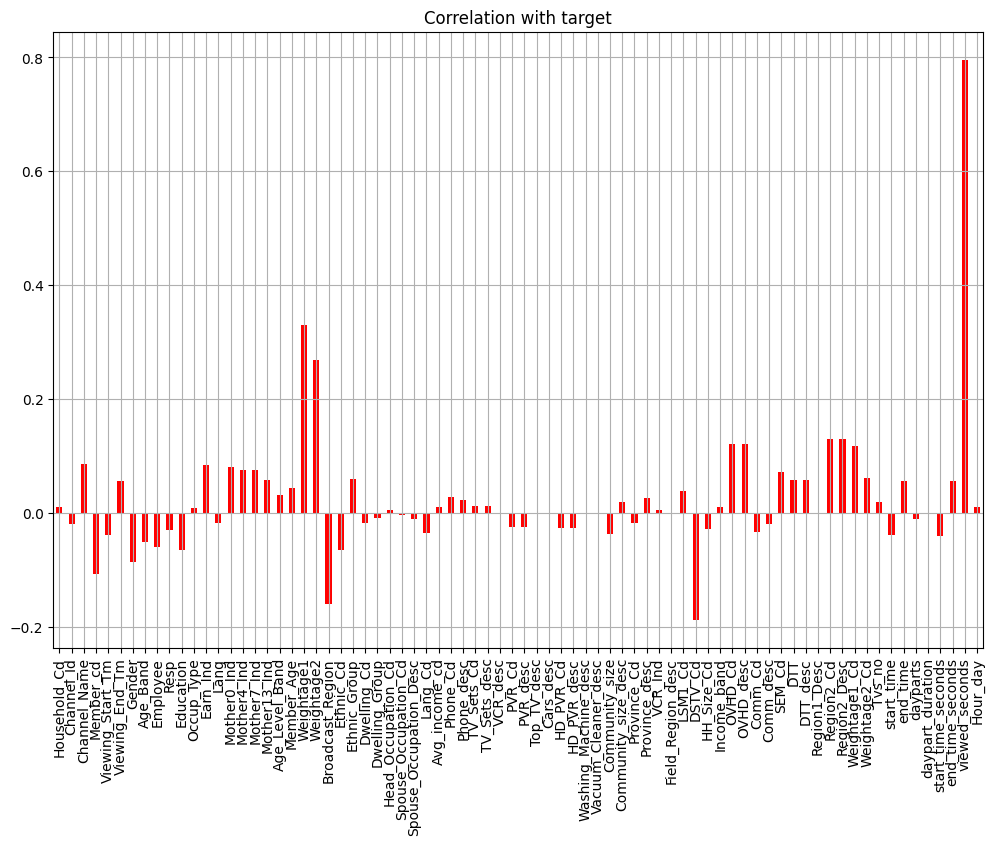

In [43]:
# Correlation with target variables
tv_ratings_data.drop('AMR_member_weights', axis=1).corrwith(tv_ratings_data.AMR_member_weights).plot(kind='bar', figsize=(12, 8), grid=True,
                                                  color='r' ,title="Correlation with target")

Conclusion:   

Dropping the columns that have no relationship with the dependent variables - ['VCR_desc','Top_TV_desc','Cars_desc','Washing_Machine_desc','Vacuum_Cleaner_desc','Field_Region_desc',
                'Region1_Desc','dayparts','Dwelling_Group','Occup_Type','Head_Occupation_Cd','VCR_Ind','Spouse_Occupation_Cd',
               'daypart_duration' ]

In [44]:
#  the correlation coefficients are calculated for each feature with respect to the dependent variable.
correlations = tv_ratings_data.corr()['AMR_member_weights'].abs().sort_values(ascending=False)
correlations

AMR_member_weights        1.000000
viewed_seconds            0.795949
Weightage1                0.329839
Weightage2                0.269657
DSTV_Cd                   0.187306
Broadcast_Region          0.160245
Region2_Cd                0.129362
Region2_Desc              0.129362
OVHD_desc                 0.120483
OVHD_Cd                   0.120483
Weightage1_Cd             0.117844
Member_cd                 0.106779
Channel_Name              0.086497
Gender                    0.086280
Earn_Ind                  0.083739
Mother0_Ind               0.080872
Mother4_Ind               0.075606
Mother7_Ind               0.075069
SEM_Cd                    0.071712
Ethnic_Cd                 0.064763
Education                 0.064502
Weightage2_Cd             0.061937
Employee                  0.060185
Ethnic_Group              0.059876
Mother13_Ind              0.058375
DTT                       0.057554
DTT_desc                  0.057554
end_time_seconds          0.056455
Viewing_End_Tm      

In [45]:
# Dropping the columns that have no relationship with the dependent variables
columns_to_drops=['VCR_desc','Top_TV_desc','Cars_desc','Washing_Machine_desc','Vacuum_Cleaner_desc','Field_Region_desc',
                'Region1_Desc','dayparts','Dwelling_Group','Occup_Type','Head_Occupation_Cd','VCR_Ind','Spouse_Occupation_Cd',
               'daypart_duration' ]

In [46]:
tv_ratings_data.drop(columns=columns_to_drops, inplace=True)

In [47]:
# Size of the dataset
tv_ratings_data.shape

(215213, 63)

### Forward Elimination

In [48]:
#Importing the library:
import statsmodels.api as sm

In [49]:
# Start forward elimination
selected_features = []
remaining_features = tv_ratings_data.drop('AMR_member_weights', axis=1).columns.tolist()

while remaining_features:
    best_feature = None
    best_model = None
    best_pvalue = float('inf')
    
    for feature in remaining_features:
        X = sm.add_constant(tv_ratings_data[selected_features + [feature]])
        y = tv_ratings_data['AMR_member_weights']
        model = sm.OLS(y, X).fit()
        pvalue = model.pvalues[feature]
        
        if pvalue < best_pvalue:
            best_feature = feature
            best_model = model
            best_pvalue = pvalue
    
    if best_pvalue < 0.05:  # Significance threshold
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
    else:
        break

# Print the selected features and the final model summary
print("Selected Features:", selected_features)
print(best_model.summary())

Selected Features: ['Channel_Name', 'Member_cd', 'Weightage1', 'viewed_seconds', 'Mother0_Ind', 'Broadcast_Region', 'Ethnic_Group', 'Employee', 'Mother13_Ind', 'Age_Band', 'Tvs_no', 'DTT', 'Weightage2', 'DTT_desc', 'Comm_desc', 'Education', 'Phone_desc', 'DSTV_Cd', 'Lang_Cd', 'Weightage1_Cd', 'Household_Cd', 'Province_desc', 'Lang', 'HH_Size_Cd', 'Spouse_Occupation_Desc', 'Mother7_Ind', 'Viewing_End_Tm', 'start_time', 'end_time', 'end_time_seconds', 'start_time_seconds', 'Community_size', 'Mother4_Ind', 'Channel_Id', 'Income_band', 'Hour_day', 'SEM_Cd']
                            OLS Regression Results                            
Dep. Variable:     AMR_member_weights   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.544e+04
Date:                Wed, 27 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:29:30   Log-L

Conclusion:

These are the Significant models that we'll use to train our model

[ 'Channel_Name', 'Member_cd', 'Weightage1', 'viewed_seconds', 'Mother0_Ind', 'Broadcast_Region', 'Ethnic_Group', 'Employee', 'Mother13_Ind', 'Age_Band', 'Tvs_no', 'DTT', 'Weightage2', 'DTT_desc', 'Comm_desc', 'Education', 'Phone_desc', 'DSTV_Cd', 'Lang_Cd', 'Weightage1_Cd', 'Household_Cd', 'Province_desc', 'Lang', 'HH_Size_Cd', 'Spouse_Occupation_Desc', 'Mother7_Ind', 'Viewing_End_Tm', 'start_time', 'end_time', 'start_time_seconds', 'end_time_seconds', 'Community_size', 'Mother4_Ind', 'Channel_Id', 'Income_band', 'Hour_day', 'SEM_Cd']

In [50]:
colum=[ 'Channel_Name', 'Member_cd', 'Weightage1', 'viewed_seconds', 'Mother0_Ind', 'Broadcast_Region',
       'Ethnic_Group', 'Employee', 'Mother13_Ind', 'Age_Band', 'Tvs_no', 'DTT', 'Weightage2', 'DTT_desc', 
       'Comm_desc', 'Education', 'Phone_desc', 'DSTV_Cd', 'Lang_Cd', 'Weightage1_Cd', 'Household_Cd',
       'Province_desc', 'Lang', 'HH_Size_Cd', 'Spouse_Occupation_Desc', 'Mother7_Ind', 'Viewing_End_Tm', 
       'start_time', 'end_time', 'start_time_seconds', 'end_time_seconds', 'Community_size', 'Mother4_Ind',
       'Channel_Id', 'Income_band', 'Hour_day', 'SEM_Cd','AMR_member_weights']

In [51]:
tv_ratings_datas = tv_ratings_data[colum]

In [52]:
tv_ratings_datas.head(2)

,Channel_Name,Member_cd,Weightage1,viewed_seconds,Mother0_Ind,Broadcast_Region,Ethnic_Group,Employee,Mother13_Ind,Age_Band,Tvs_no,DTT,Weightage2,DTT_desc,Comm_desc,Education,Phone_desc,DSTV_Cd,Lang_Cd,Weightage1_Cd,Household_Cd,Province_desc,Lang,HH_Size_Cd,Spouse_Occupation_Desc,Mother7_Ind,Viewing_End_Tm,start_time,end_time,start_time_seconds,end_time_seconds,Community_size,Mother4_Ind,Channel_Id,Income_band,Hour_day,SEM_Cd,AMR_member_weights
0,1.237253,-1.882359,-0.159798,-0.526272,-2.110705,-1.497829,-0.362533,-0.004863,1.074696,0.939352,-0.44954,-0.285215,-0.074155,-0.285215,1.354841,1.414804,-0.194194,-1.6775,-0.489167,-0.024553,-0.043587,-0.195232,0.753659,0.218646,0.506842,-2.034217,0.608621,0.670464,0.603289,0.657897,0.595657,-0.965221,-1.914908,-1.008968,-0.252126,-0.187325,-0.508341,15.146103
1,-0.140245,-1.882359,-0.159798,-0.455849,-2.110705,-1.497829,-0.362533,-0.004863,1.074696,0.939352,-0.44954,-0.285215,-0.074155,-0.285215,1.354841,1.414804,-0.194194,-1.6775,-0.489167,-0.024553,-0.043587,-0.195232,0.753659,0.218646,0.506842,-2.034217,-1.871789,-1.730943,-1.768954,-1.786004,-1.844034,-0.965221,-1.914908,-1.068631,-0.252126,1.203307,-0.508341,143.442503


In [53]:
# Size of the dataset
tv_ratings_datas.shape

(215213, 38)

In [63]:
tv_ratings_datas.to_csv(r'tvv_ratings_datas.csv', index = False)

In [3]:
# Load Datasets
tvv_ratings_data = pd.read_csv('tvv_ratings_datas.csv')

In [4]:
# Size of the datasets
tvv_ratings_data.shape

(215213, 38)

In [54]:
# spliting the dataset into features(independend variables) and target(dependent variables)
# X=tv_ratings_datas.iloc[:,:-1]
# y=tv_ratings_datas.iloc[:,-1]

In [55]:
# Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

## Linear Regression

In [5]:
from pycaret.regression import *

#### Split Your Data into Training and Testing Sets

In [6]:
# Split the data into training and testing sets (default: 70% training, 30% testing)
train_data = tvv_ratings_data.sample(frac=0.7, random_state=42)
test_data = tvv_ratings_data.drop(train_data.index)

In [7]:
# Size of train dataset
train_data.shape

(150649, 38)

In [8]:
# Size of test dataset
test_data.shape

(64564, 38)

In [9]:
# Initialize the regression setup with training data
reg=setup(data=train_data,target='AMR_member_weights',session_id=123)

,Description,Value
0,Session id,123
1,Target,AMR_member_weights
2,Target type,Regression
3,Original data shape,"(150649, 38)"
4,Transformed data shape,"(150649, 38)"
5,Transformed train set shape,"(105454, 38)"
6,Transformed test set shape,"(45195, 38)"
7,Numeric features,37
8,Preprocess,True
9,Imputation type,simple


In [10]:
# Compare different regression models
best=compare_models(exclude=['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,85.3645,116718.7032,275.9803,0.9886,1.6064,1.1962,37.3300
et,Extra Trees Regressor,9.0349,135222.6681,197.3403,0.9879,0.0638,0.0036,166.2280
rf,Random Forest Regressor,13.0877,146307.0272,258.3587,0.9865,0.0333,0.0050,92.0060
lightgbm,Light Gradient Boosting Machine,44.5502,200324.3880,373.1092,0.9803,0.8598,0.2676,1.2150
dt,Decision Tree Regressor,29.9814,202584.7651,384.1399,0.9782,0.0225,0.0141,1.4300
ada,AdaBoost Regressor,1202.6143,2417442.6270,1545.8590,0.7205,3.4940,57.8561,9.2770
lr,Linear Regression,656.5472,2562531.3625,1587.3556,0.7136,2.8375,23.6850,1.1870
ridge,Ridge Regression,656.2346,2562375.8750,1587.3092,0.7136,2.8378,23.6743,0.1160
br,Bayesian Ridge,656.2399,2562735.8125,1587.4232,0.7136,2.8378,23.6748,0.6100
llar,Lasso Least Angle Regression,653.7622,2574781.1125,1591.2359,0.7121,2.8460,23.5294,0.1080


Conclusion:   
    
The analysis shows that the Gradient Boosting Regressor gives better accuracy compared to all other regression models

### Creating a model using a particular Regression method

In [11]:
# Create a Extra Trees regression model using training data
et=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.6137,10332.0976,101.6469,0.9989,0.0098,0.0038
1,10.3168,59453.5161,243.8309,0.9940,0.0081,0.0037
2,9.1988,14607.9385,120.8633,0.9983,0.1214,0.0035
3,6.3394,2280.8804,47.7586,0.9997,0.0758,0.0035
4,6.5528,3666.3169,60.5501,0.9996,0.0583,0.0034
5,7.6131,3418.7526,58.4701,0.9996,0.0518,0.0039
6,7.2060,3527.8522,59.3957,0.9995,0.0862,0.0037
7,8.0011,8222.4276,90.6776,0.9991,0.0777,0.0036
8,8.0545,5814.3733,76.2520,0.9994,0.0521,0.0036


In [ ]:
# Tune the model
tuned_et = tune_model(et)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:26:10
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# plot fine tune_model
plot_model(tuned_et)

In [ ]:
# Predicition error plot
plot_model(tuned_et,plot='error')

In [ ]:
# plot all the important features
plot_model(tuned_et,plot='feature')

In [ ]:
# Make predictions on validation dataset
predict_model(tuned_et)

In [ ]:
# Make predictions on test data
test_pred = predict_model(tuned_et, data=test_data)

In [ ]:
test_pred.head()

In [ ]:
# to save model
save_model(tuned_et,'Regression Model')

In [ ]:
# to load model
saved_final_model=load_model('Regression Model')

In [ ]:
# Make predictions
new_prediction = predict_model(saved_final_model, data=test_data)

In [ ]:
new_prediction.head()